In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

##### Exercise 11.1

In [2]:
# Superparameters
n_epochs = 60
n_training_data = 1000

In [3]:
# Generate training inputs
np.random.seed(0)
in_training   = np.random.uniform(-1, 1, n_training_data)
in_validation = np.random.uniform(-1, 1, 10)
in_validation.sort()

a = 2
b = 1
out_target = a * in_validation + b
# This is the data set that the machine should learn to calculate.

sigma = 0.2 # Standard deviation of Gaussian noise (zero ATM)
out_training   = np.random.normal(a * in_training + b, sigma) # Actual measures, from which we want to guess regression parameters.
out_validation = np.random.normal(a * in_validation + b, sigma)

###### Definition of the neural network

In [4]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape = (1,)))
# Compile the model choosing the optimizer, loss and metrics objects.
model.compile(optimizer = "sgd", loss = "mse", metrics = ["mse"])

###### Summary of the model

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


###### Training

In [6]:
# Evaluate the model using the "training" dataset,
# over 10 epochs of 32 batch size each
history = model.fit(
    x = in_training,
    y = out_training,
    batch_size = 32,
    epochs = n_epochs,
    shuffle = True, # It is a good idea to shuffle the input before each epoch.
    validation_data = (in_validation, out_validation)
)

Train on 1000 samples, validate on 10 samples
Epoch 1/60
1000/1000 [==============================] - 0s 288us/step - loss: 1.0263 - mean_squared_error: 1.0263 - val_loss: 0.7514 - val_mean_squared_error: 0.7514
Epoch 2/60
1000/1000 [==============================] - 0s 15us/step - loss: 0.4673 - mean_squared_error: 0.4673 - val_loss: 0.4126 - val_mean_squared_error: 0.4126
Epoch 3/60
1000/1000 [==============================] - 0s 14us/step - loss: 0.2563 - mean_squared_error: 0.2563 - val_loss: 0.2571 - val_mean_squared_error: 0.2571
Epoch 4/60
1000/1000 [==============================] - 0s 14us/step - loss: 0.1625 - mean_squared_error: 0.1625 - val_loss: 0.1735 - val_mean_squared_error: 0.1735
Epoch 5/60
1000/1000 [==============================] - 0s 14us/step - loss: 0.1140 - mean_squared_error: 0.1140 - val_loss: 0.1234 - val_mean_squared_error: 0.1234
Epoch 6/60
1000/1000 [==============================] - 0s 14us/step - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.0

1000/1000 [==============================] - 0s 14us/step - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 51/60
1000/1000 [==============================] - 0s 14us/step - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 52/60
1000/1000 [==============================] - 0s 14us/step - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 53/60
1000/1000 [==============================] - 0s 14us/step - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 54/60
1000/1000 [==============================] - 0s 13us/step - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 55/60
1000/1000 [==============================] - 0s 14us/step - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 56/60
1000

In [7]:
model.get_weights()

[array([[1.9895346]], dtype=float32), array([1.0053424], dtype=float32)]

In [8]:
test_loss, test_accuracy = model.evaluate(
    in_validation,
    out_validation,
    batch_size = 32,
    verbose = 1
)

print("Test loss: ", test_loss)
print("Test accuracy: ", test_accuracy)

10/10 [==============================] - 0s 51us/step
Test loss:  0.028211262077093124
Test accuracy:  0.028211262077093124


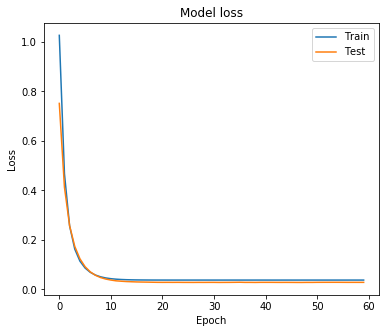

In [9]:
# look into training history
# Plot training & validation loss values
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))

axes.plot(history.history["loss"])
axes.plot(history.history["val_loss"])
axes.set_title("Model loss")
axes.set_ylabel("Loss")
axes.set_xlabel("Epoch")
axes.legend(["Train", "Test"], loc = "best")

plt.show()

###### Predictions

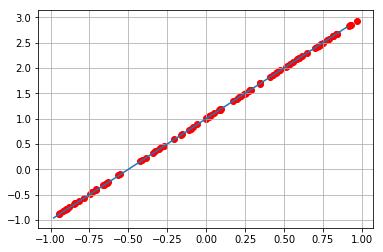

In [10]:
in_predicted = np.random.uniform(-1, 1, 100)
out_predicted = model.predict(in_predicted)
plt.scatter(in_predicted, out_predicted, color = "red", label = "Prediction")
plt.plot(in_validation, out_target)
# in_target == in_validation
plt.grid(True)
plt.show()

###### Comments
It seems that the higher the number of "training data points" is, the better the result, but this of course comes at the cost of an increased computation time.
60 epochs and 1000 training data points are enough to estimate the parameters correctly within three significant digits.